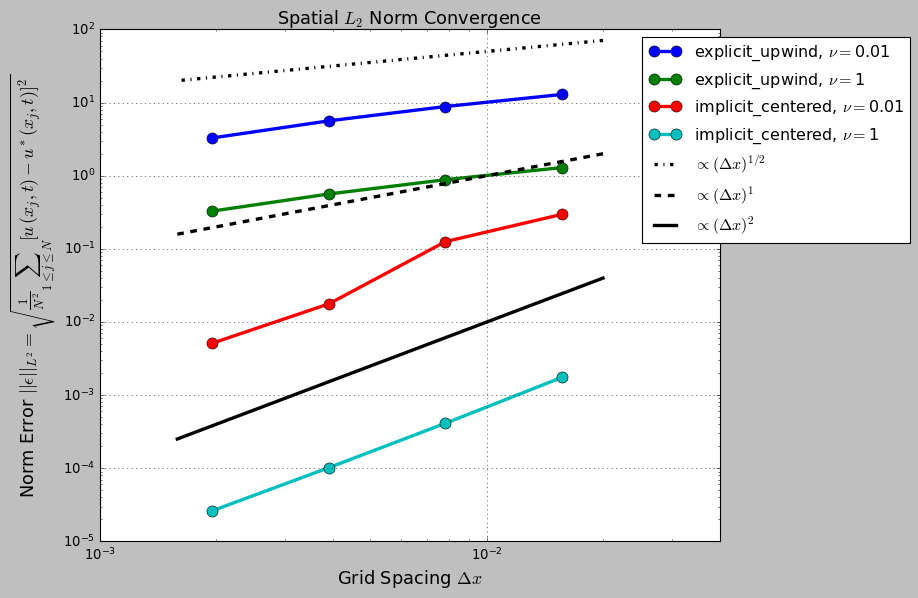

In [47]:
from math import comb
import numpy as np
import matplotlib.pyplot as plt
from glob import glob


if __name__ == "__main__":

    combos = []
    alldxs = []
    allnorms = []

    for prefix in ["explicit_upwind", "implicit_centered"]:
        for diffval in ["0.01", "1"]:

            minfile = glob(f"../conv_data/{prefix}_n32_v{diffval}")[0]
            file64 = glob(f"../conv_data/{prefix}_n64_v{diffval}")[0]
            file128 = glob(f"../conv_data/{prefix}_n128_v{diffval}")[0]
            file256 = glob(f"../conv_data/{prefix}_n256_v{diffval}")[0]
            file512 = glob(f"../conv_data/{prefix}_n512_v{diffval}")[0]

            mindata = np.genfromtxt(
                sorted(glob(f"{minfile}/outputs/*.csv"))[9], delimiter=", "
            )[:-1]
            data64 = np.genfromtxt(
                sorted(glob(f"{file64}/outputs/*.csv"))[9], delimiter=", "
            )[:-1]
            data128 = np.genfromtxt(
                sorted(glob(f"{file128}/outputs/*.csv"))[9], delimiter=", "
            )[:-1]
            data256 = np.genfromtxt(
                sorted(glob(f"{file256}/outputs/*.csv"))[9], delimiter=", "
            )[:-1]
            data512 = np.genfromtxt(
                sorted(glob(f"{file512}/outputs/*.csv"))[9], delimiter=", "
            )[:-1]

            # print(data128)

            norms = []
            dxs = []

            # check error on 64
            shrunk_ds = np.mean(
                data64.reshape((mindata.size, data64.size // mindata.size)), axis=1
            )
            # print(shrunk_ds)
            norms.append(np.sqrt(((shrunk_ds - mindata) ** 2).sum()))
            dxs.append(64)

            # check error on 128
            shrunk_ds = np.mean(
                data128.reshape((data64.size, data128.size // data64.size)), axis=1
            )
            # print(shrunk_ds)
            norms.append(np.sqrt(((shrunk_ds - data64) ** 2).sum()))
            dxs.append(128)

            # check error on 256
            shrunk_ds = np.mean(
                data256.reshape((data128.size, data256.size // data128.size)), axis=1
            )
            # print(shrunk_ds)
            norms.append(np.sqrt(((shrunk_ds - data128) ** 2).sum()))
            dxs.append(256)

            # Check on 512
            shrunk_ds = np.mean(
                data512.reshape((data256.size, data512.size // data256.size)), axis=1
            )
            # print(shrunk_ds)
            norms.append(np.sqrt(((shrunk_ds - data256) ** 2).sum()))
            dxs.append(512)

            alldxs.append(dxs)
            allnorms.append(norms)
            combos.append(rf"{prefix}, $\nu =${diffval}")

            # print(norms)

    plt.style.use("classic")
    fig = plt.figure(figsize=(10, 8))

    plt.loglog(
        1 / np.array(alldxs[0]),
        allnorms[0],
        label=combos[0],
        linewidth=3,
        markersize=10,
        marker="o",
        linestyle="-",
    )
    plt.loglog(
        1 / np.array(alldxs[1]),
        allnorms[1],
        label=combos[1],
        linewidth=3,
        markersize=10,
        marker="o",
        linestyle="-",
    )
    plt.loglog(
        1 / np.array(alldxs[2]),
        allnorms[2],
        label=combos[2],
        linewidth=3,
        markersize=10,
        marker="o",
        linestyle="-",
    )
    plt.loglog(
        1 / np.array(alldxs[3]),
        allnorms[3],
        label=combos[3],
        linewidth=3,
        markersize=10,
        marker="o",
        linestyle="-",
    )

    N_trend = np.logspace(1.7, 2.8, 100)
    plt.loglog(
        1 / N_trend,
        500 * (1 / N_trend) ** (0.5),
        label=r"$\propto (\Delta x)^{1/2}$",
        linewidth=3,
        color="black",
        linestyle="-.",
    )
    plt.loglog(
        1 / N_trend,
        100 * (1 / N_trend) ** (1),
        label=r"$\propto (\Delta x)^{1}$",
        linewidth=3,
        color="black",
        linestyle="--",
    )
    plt.loglog(
        1 / N_trend,
        100 * (1 / N_trend) ** (2),
        label=r"$\propto (\Delta x)^{2}$",
        linewidth=3,
        color="black",
        linestyle="-",
    )
    plt.minorticks_on()
    plt.legend(bbox_to_anchor=(1.32, 1.0))
    plt.grid()
    plt.xlim(0.001, 0.04)
    # plt.ylim(0.0003,5)

    plt.xlabel(r"Grid Spacing $\Delta x$", fontsize=16)
    plt.ylabel(
        r"Norm Error $||\epsilon||_{L^2} = \sqrt{\frac{1}{N^2} \sum_{1 \leq j \leq N} [u \, (x_j, t) - u^*(x_j, t)]^2}$",
        fontsize=16,
    )
    plt.title(r"Spatial $L_2$ Norm Convergence", fontsize=16)

    plt.savefig("convergence_plot_spatial.png", bbox_inches="tight", dpi=300)


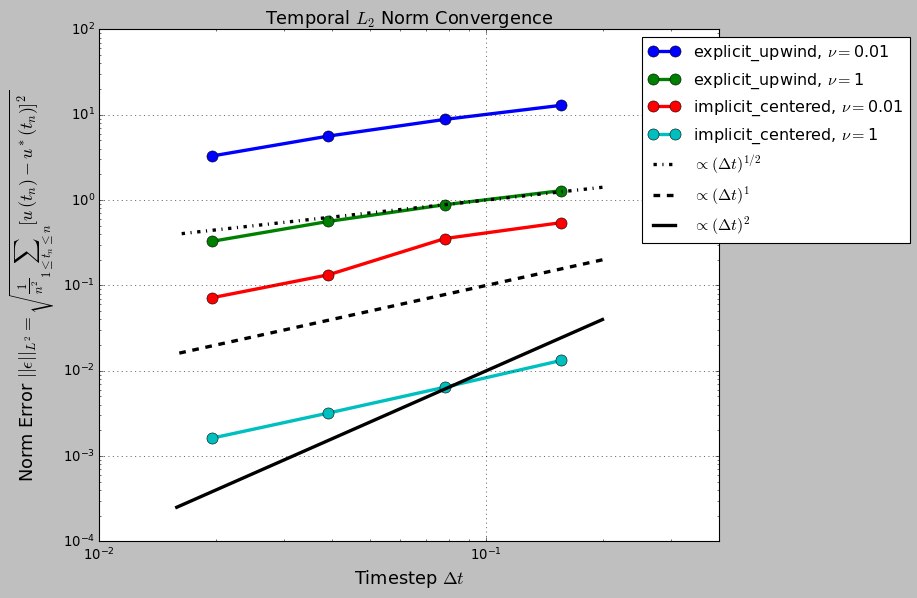

In [48]:
    plt.style.use("classic")
    fig = plt.figure(figsize=(10, 8))

    plt.loglog(
        1 / np.array(alldts[0]),
        allnorms[0],
        label=combos[0],
        linewidth=3,
        markersize=10,
        marker="o",
        linestyle="-",
    )
    plt.loglog(
        1 / np.array(alldts[1]),
        allnorms[1],
        label=combos[1],
        linewidth=3,
        markersize=10,
        marker="o",
        linestyle="-",
    )
    plt.loglog(
        1 / np.array(alldts[2]),
        allnorms[2],
        label=combos[2],
        linewidth=3,
        markersize=10,
        marker="o",
        linestyle="-",
    )
    plt.loglog(
        1 / np.array(alldts[3]),
        allnorms[3],
        label=combos[3],
        linewidth=3,
        markersize=10,
        marker="o",
        linestyle="-",
    )

    N_trend = np.logspace(1.7, 2.8, 100)
    plt.loglog(
        1 / N_trend,
        10.0 * (1 / N_trend) ** (0.5),
        label=r"$\propto (\Delta t)^{1/2}$",
        linewidth=3,
        color="black",
        linestyle="-.",
    )
    plt.loglog(
        1 / N_trend,
        10.0 * (1 / N_trend) ** (1),
        label=r"$\propto (\Delta t)^{1}$",
        linewidth=3,
        color="black",
        linestyle="--",
    )
    plt.loglog(
        1 / N_trend,
        100 * (1 / N_trend) ** (2),
        label=r"$\propto (\Delta t)^{2}$",
        linewidth=3,
        color="black",
        linestyle="-",
    )
    plt.minorticks_on()
    plt.legend(bbox_to_anchor=(1.32, 1.0))
    plt.grid()
    plt.xlim(0.01, 0.4)
    # plt.ylim(0.0003,5)

    plt.xlabel(r"Timestep $\Delta t$", fontsize=16)
    plt.ylabel(
        r"Norm Error $||\epsilon||_{L^2} = \sqrt{\frac{1}{n^2} \sum_{1 \leq t_n \leq n} [u \, (t_n) - u^*(t_n)]^2}$",
        fontsize=16,
    )
    plt.title(r"Temporal $L_2$ Norm Convergence", fontsize=16)

    plt.savefig("convergence_plot_temporal.png", bbox_inches="tight", dpi=300)
